In [163]:
import pandas as pd
import numpy as np
from plotnine import *

In [164]:
train = pd.read_csv('train.csv')
train.shape

(891, 12)

In [165]:
test = pd.read_csv('test.csv')
test.shape

(418, 11)

In [166]:
train_data_age = train[train['Age'].notnull()]
test_data_age = train[train['Age'].isnull()]
train_data_age.shape, test_data_age.shape

((714, 12), (177, 12))

In [167]:
# embarked one-hot-encoding 하기
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data
    
dummy_columns = ['Sex', 'Pclass', 'Embarked']
train = dummy_data(train, dummy_columns)
test = dummy_data(test, dummy_columns)

train

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1
5,6,0,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,0,1,0,1,0
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,1,0,0,0,0,1
7,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,1,0,0,1,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,1,0,0,0,1,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,0,0,1,0,1,0,0


In [168]:
from sklearn.ensemble import RandomForestRegressor

# age 예측해서 채우기
def fill_missing_values(df, column_name):
    train = df.loc[(df[column_name].notnull())] # age 값이 있는 row
    test = df.loc[(df[column_name].isnull())] # age 값이 없는 row
    
    train_X = train.drop(columns = column_name, axis = 1)
    test_X = test.drop(columns = column_name, axis =1 )
    y = train[column_name]
    print(train_X.shape)
    print(test_X.shape)
    print(len(y))
    
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(train_X, y)
    
    predictedVals = rtr.predict(test_X)
    df.loc[df[column_name].isnull(), column_name] = predictedVals
    
    return df

In [169]:
train_for_age = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_for_age.isnull().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [170]:
train_for_age = fill_missing_values(train_for_age, 'Age')
train['Age'] = train_for_age['Age'].copy()

(714, 12)
(177, 12)
714


In [171]:
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [172]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

def normalize_val(data, column_name):
    scaler = MinMaxScaler()
    data[column_name] = scaler.fit_transform(data[column_name].values.reshape(-1,1))
    return data


train_normalize = train.drop(columns = 'Cabin', axis=1)
train_normalize = normalize_val(train_normalize, 'Age')

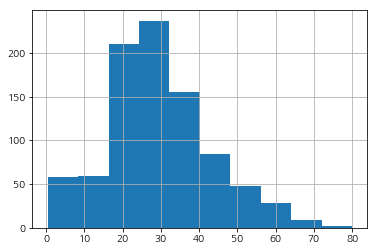

In [176]:
train['Age'].hist()

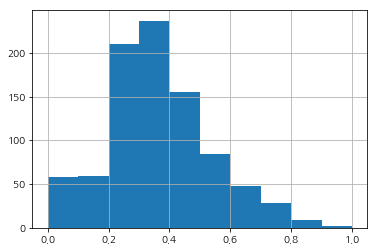

In [175]:
train_normalize['Age'].hist()